# Predict Password Strength
## In this notebook we will work on a NLP(Natural Language Processing) project, in this project we will predict whether the strength of a given password is weak, normal or strong. 

**Import all the important tools**

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
data=pd.read_csv(r"data.csv",error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
# check for the empty spaces in data
data.isna().sum()

password    1
strength    0
dtype: int64

In [4]:
# drop the empty row
data.dropna(inplace=True)
data.isna().sum()

password    0
strength    0
dtype: int64

In [5]:
data["strength"].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

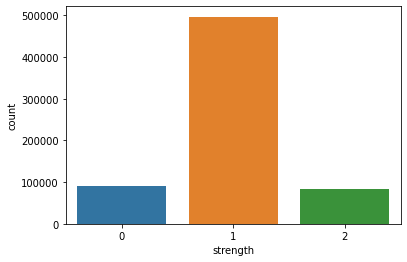

In [6]:
sns.countplot(data["strength"]);

**Our data is Unbalanced**

### Shuffle the data


In [7]:
import random
password_array=np.array(data)

random.shuffle(password_array)
password_array[:5]

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['visi7k1yr', 1],
       ['megzy123', 1],
       ['kino3434', 1]], dtype=object)

In [8]:
# Seperate data form target variable
X=[labels[0] for labels in password_array]
y=[labels[1] for labels in password_array]

X[:5]


['kzde5577', 'kzde5577', 'visi7k1yr', 'megzy123', 'kino3434']

In [9]:
y[:5]

[1, 1, 1, 1, 1]

## Create a function which will break these passwords inro characters

In [11]:
def word_divide_char(inputs):
    
    return list(inputs)

### Vectorize our data using TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [15]:
## Transform the data
data=vectorizer.fit_transform(X)

In [16]:
data.shape

(669639, 123)

## So we have 123 columns or variables in our data

In [19]:
vectorizer.get_feature_names()

['\x02',
 '\x05',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '¡',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'í',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‹',
 '›']

In [23]:
first_document_vector=data[0]

# Put this into data frame

df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=["TF-IDF"])

In [27]:
df.sort_values(by=["TF-IDF"],ascending=False)


,TF-IDF
7,0.590981
5,0.567660
z,0.335979
k,0.291932
d,0.285659
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [30]:
# Train the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2)

model=LogisticRegression(random_state=42,multi_class="multinomial")

model.fit(X_train,y_train)


LogisticRegression(multi_class='multinomial', random_state=42)

In [32]:
model.score(X_test,y_test)

0.8187757601099098

**So our model accuracy is 82% which is good but not great, we will try to use different algorithm or models to fit our data on and hopefully we'll get better results** 